In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json_tricks

In [2]:
inputs = json_tricks.load('inputs/inputs.json')

# Task

In the input file, you are given the tables of statistical weights $M(\xi=x, \eta=y)$ of random values together with actual possible values of the random values.

Your task is to:

0) Find distribution $p(\xi=x, \eta=y)$
1) Find distribution $p(\xi = x)$
2) Find distribution $p(\eta = y)$
3) Check if $\xi$ and $\eta$ are independent (definition of independency is required)
4) Find marginal distribution $p(\xi=x|\eta=y)$
5) Find marginal distribution $p(\eta=y|\xi=x)$ (this one can be done using Bayes theorem)
6) Find $\mathbb E \xi$
7) Find $\mathbb E \eta$
8) Find $\mathbb E (\xi + \eta)$
8) Find $\mathbb E (\xi \eta)$
9) Find $\mathbb E \exp(\xi + \eta)$
10) Find $\mathbb V \xi$
11) Find $\mathbb V \eta$
11) Find $\mathbb V (\eta + \xi)$
12) Find $\sigma_{\xi}$
13) Find $\sigma_{\eta}$
12) Find $\mathrm{cov} (\xi, \eta)$

If you need to return a numpy array, consider it to be aligned with input $M$ array, meaning 
that if `M[i, j]` is the measure of event of $\xi = x_i, \eta = y_j$, then the corresponding
`p[i, j]` is the probability of the corresponding event, `p_x[i]` is the probability of $\xi = x_i$
and `p_x[j]` is the probability of $\eta = y_j$.

In [16]:
def task(measure, xvals, yvals):

    measure = np.array(measure, dtype = float)
    xvals = np.array(xvals, dtype = float)
    yvals = np.array(yvals, dtype = float)

    if measure.sum() == 0:
        p = np.zeros_like(measure)
    else:
        p = measure / measure.sum()


    p_x = p.sum(axis= 1)
    p_y = p.sum(axis = 0)
    independency = np.allclose(p, np.outer(p_x, p_y))
    p_x_giv_y = 0
    p_y_giv_x = 0
    Ex = np.sum(xvals * p_x)
    Ey = np.sum(yvals * p_y)
    Ex_plus_y = 0
    Ex_times_y = 0
    Eexp = 0
    Vx = np.sum((xvals-Ex)**2 * p_x)
    Vy = np.sum((yvals-Ey)**2 * p_y)
    Vx_plus_y = 0
    sigmax = 0
    sigmay = 0
    covxy = 0
    linear_independency = False



    return{
        'p': p,
        'p_x': p_x,
        'p_y': p_y,
        'independency': independency,
        'p_x_giv_y': p_x_giv_y,
        'p_y_giv_x': p_y_giv_x,
        'Ex': Ex,
        'Ey': Ey,
        'Ex_plus_y': Ex_plus_y,
        'Ex_times_y': Ex_times_y,
        'Eexp': Eexp,
        'Vx': Vx,
        'Vy': Vy,
        'Vx_plus_y': Vx_plus_y,
        'sigmax': sigmax,
        'sigmay': sigmay,
        'covxy': covxy,
        'linear_independency': linear_independency
    }

In [17]:
answer = []
for input in inputs:
    answer.append(task(**input))

json_tricks.dump(answer, '.answer.json')

'[{"p": {"__ndarray__": [[0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776], [0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776], [0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776], [0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776], [0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776], [0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776, 0.027777777777777776]], "dtype": "float64", "shape": [6, 6], "Corder": true}, "p_x": {"__ndarray__": [0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.16666666666666669, 0.166666

# Visualization: Two Dice

The first task corresponds is simpultaneous rolling of two dice (as you do in Monopoly or Catan)

Let us visualize the distribution of $\xi + \eta$, its mean and standard deviation

Does this make sense? How can we utilize this information when playing Catan or Monopoly?

[[0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]
 [0.02777778 0.02777778 0.02777778 0.02777778 0.02777778 0.02777778]]


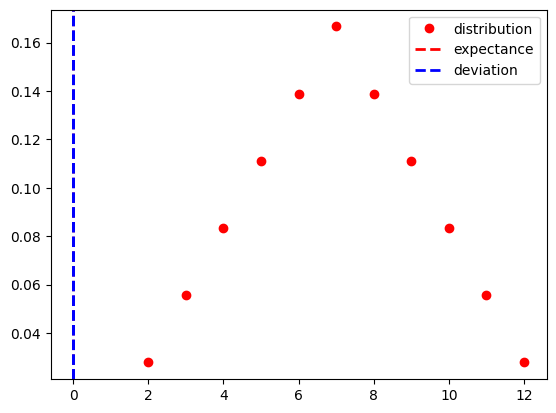

In [18]:
two_dice = answer[0]

print(two_dice['p'])

x_plus_y_p = {}
for x_index in range(two_dice['p'].shape[0]):
    for y_index in range(two_dice['p'].shape[1]):
        if x_index + 1 + y_index + 1 not in x_plus_y_p:
            x_plus_y_p[x_index + 1 + y_index + 1] = 0
        x_plus_y_p[x_index + 1 + y_index + 1] += two_dice['p'][x_index, y_index]

# print(x_plus_y_p)
# x_plus_y_p = dict(sorted(x_plus_y_p))
# print(x_plus_y_p)
plt.plot(list(x_plus_y_p.keys()), list(x_plus_y_p.values()), 'ro')
plt.axvline(x=two_dice['Ex_plus_y'], color='r', linestyle='--', linewidth=2)
plt.axvline(x=two_dice['Ex_plus_y'] - np.sqrt(two_dice['Vx_plus_y']), color='b', linestyle='--', linewidth=2)
plt.axvline(x=two_dice['Ex_plus_y'] + np.sqrt(two_dice['Vx_plus_y']), color='b', linestyle='--', linewidth=2)
plt.legend(['distribution', 'expectance', 'deviation'])

# Interesting fact

Note that 2nd testcase is about the non-linearly independent random values

Let us check:
- covariance
- independency
- linear independency

In [19]:
two_dice = answer[1]

print(two_dice['covxy'])
print(two_dice['linear_independency'])
print(two_dice['independency'])

0
False
False


Indeed, this distribution is dependent, but not linearly